In [1]:
cd ..

/ssd_data_tgreer/rl/comp_755_project


In [2]:
import rl755.data.generic

In [3]:
import matplotlib.pyplot as plt

In [4]:
import procgen

In [5]:
import os
import tensorflow as tf
import tensorflow_addons as tfa


In [6]:
def tf_replace(t, b, a):
    t2 = tf.where( tf.equal( b, t ), a * tf.ones_like( t ), t )
    return t2

In [7]:
from rl755.models.vision import vision_trained, instances

env="caveflyer"

model = instances.residual_vae_64d(env)

model.load_weights(f"../tmp/{env}/vision_model/residual_vae_64d/model-043.hdf5")
import numpy as np

In [8]:
dsb = rl755.data.generic.RawRollouts(env)
x = dsb.rollouts_ds(split="train", process_observations=True).as_numpy_iterator()

TODO: THIS IS JUST A TEST VERSION OF RAW ROLLOUTS!!!


In [9]:
record = next(x)


obs = record["observations"]



z = model.compute_full_representation(obs)

obshat = model(obs, training=False)

first = model.vae.decode(z[:, :32])
second = model.residue_vae.decode(z[:, 32:])




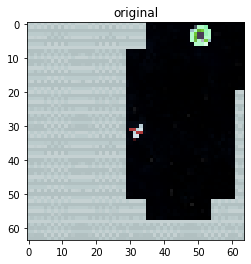

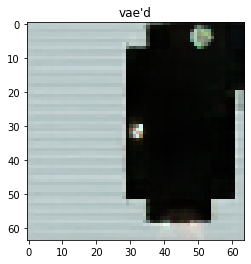

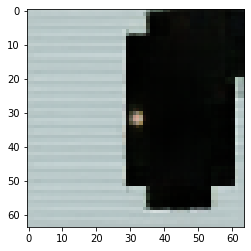

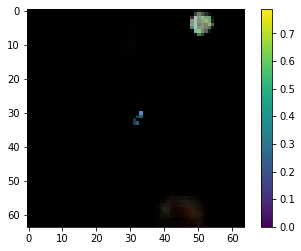

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


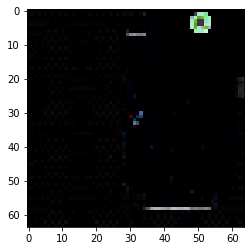

In [10]:
N = 860
plt.imshow(obs[N])
plt.title("original")
plt.show()
plt.imshow(obshat[N])
plt.title("vae'd")
plt.show()

plt.imshow(first[N])
plt.show()
plt.imshow(second[N, :, :])
plt.colorbar()

plt.show()
plt.imshow(model.residue[N])



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


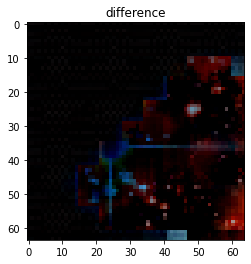

(1001, 1, 64, 1)


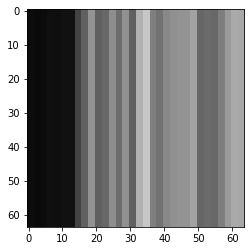

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


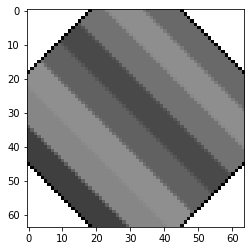

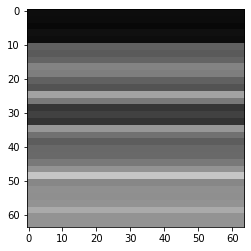

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


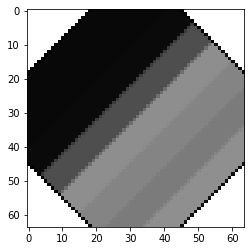

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


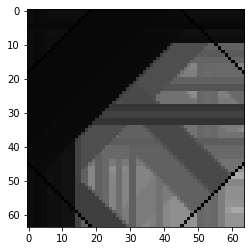

In [50]:
difference = obs - obshat

plt.imshow(difference[N])
plt.title("difference")
plt.show()
d1 = tf.reduce_max(difference, axis=1, keepdims=True)
d1 = tf.reduce_max(d1, axis=3, keepdims=True)
d2 = tfa.image.rotate(difference, -np.pi / 4, "bilinear")
d2 = tf.reduce_max(d2, axis=1, keepdims=True)
d2 = tf.reduce_max(d2, axis=3, keepdims=True)

d3 = tfa.image.rotate(difference, np.pi / 2, "bilinear")
d3 = tf.reduce_max(d3, axis=1, keepdims=True)
d3 = tf.reduce_max(d3, axis=3, keepdims=True)
d4 = tfa.image.rotate(difference, np.pi / 4, "bilinear")
d4 = tf.reduce_max(d4, axis=1, keepdims=True)
d4 = tf.reduce_max(d4, axis=3, keepdims=True)

amt = [2, 8, 2, 8]


d1, d2, d3, d4 = [
    tf.nn.max_pool(d, [1, a], [1, a], padding="SAME")
    for d, a in zip((d1, d2, d3, d4), amt)]

zz = (d1, d2, d3, d4)

d1, d2, d3, d4 = [
    tf.repeat(d, a, 2)
    for d, a in zip((d1, d2, d3, d4), amt)]
print(d1.shape)


zeros = tf.zeros([64, 64, 3])
reconstructed1 = d1 + zeros
reconstructed2 = tf_replace(tfa.image.rotate(d2 + zeros + 1, np.pi / 4, "bilinear"), 0, 300) - 1
reconstructed3 = tf_replace(tfa.image.rotate(d3 + zeros + 1, -np.pi / 2, "bilinear"), 0, 300) - 1
reconstructed4 = tf_replace(tfa.image.rotate(d4 + zeros + 1, -np.pi / 4, "bilinear"), 0, 300) - 1
for r in reconstructed1, reconstructed2, reconstructed3, reconstructed4:
    plt.imshow(r[N])
    plt.show(0)
decompressed = tf.minimum(tf.minimum(reconstructed1 , reconstructed2),  tf.minimum(reconstructed3, reconstructed4))
plt.imshow(decompressed[N])

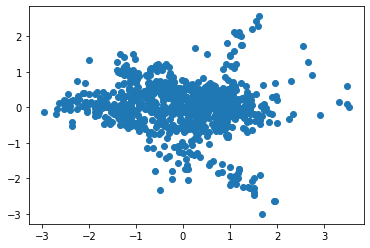

In [12]:
import matplotlib.pyplot as plt
zcloud = np.array(z)
plt.scatter(zcloud[:, 43], zcloud[:, 44])

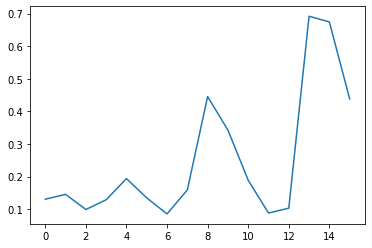

In [92]:
plt.plot(zz[0][0][0])

In [98]:
tf.concat([tf.keras.layers.Flatten()(d) for d in zz], 1)

<tf.Tensor: shape=(1001, 80), dtype=float32, numpy=
array([[0.13068011, 0.12433904, 0.14569579, ..., 0.1848737 , 0.4332801 ,
        0.13343565],
       [0.13068011, 0.12433904, 0.14569579, ..., 0.1848737 , 0.4332801 ,
        0.13343567],
       [0.13068011, 0.12433904, 0.14569579, ..., 0.1848737 , 0.43328014,
        0.13343567],
       ...,
       [0.81009704, 0.61324406, 0.33965814, ..., 0.67358446, 0.720415  ,
        0.67215735],
       [0.57121515, 0.42164096, 0.33919945, ..., 0.6442322 , 0.5999022 ,
        0.68426985],
       [0.43059584, 0.4222598 , 0.3388897 , ..., 0.60905313, 0.64437085,
        0.54173845]], dtype=float32)>

In [27]:
z.shape

TensorShape([1001, 64])

In [95]:
tf.nn.

SyntaxError: invalid syntax (<ipython-input-95-c0bd91f33e55>, line 1)

In [23]:
model.vae.get_representation_size()

32

In [30]:
vae_representation = model.vae.encode(obs).mean()
image_compressed = model.vae.decode(vae_representation)



In [31]:
vae_representation.shape

TensorShape([1001, 32])

In [32]:
z[:, :32].shape

TensorShape([1001, 32])

In [33]:
model.vae.decode(z[:, :32])

<tf.Tensor: shape=(1001, 64, 64, 3), dtype=float32, numpy=
array([[[[0.7153503 , 0.7747988 , 0.77387553],
         [0.71577084, 0.77460426, 0.7736723 ],
         [0.72303766, 0.78010905, 0.7790381 ],
         ...,
         [0.72904736, 0.78601205, 0.7871213 ],
         [0.7165343 , 0.7758719 , 0.7780598 ],
         [0.71441334, 0.7725439 , 0.7723249 ]],

        [[0.7089176 , 0.767603  , 0.7669618 ],
         [0.7096035 , 0.7701371 , 0.7699271 ],
         [0.7037411 , 0.76434433, 0.76481175],
         ...,
         [0.7078307 , 0.77015483, 0.77340543],
         [0.7117275 , 0.7728096 , 0.7756217 ],
         [0.7101626 , 0.76938885, 0.76908803]],

        [[0.7404149 , 0.79563063, 0.794259  ],
         [0.7455537 , 0.8018991 , 0.8001088 ],
         [0.75687957, 0.81135017, 0.8109286 ],
         ...,
         [0.7634617 , 0.82001656, 0.8234269 ],
         [0.7447755 , 0.8044899 , 0.80903095],
         [0.7441978 , 0.8006144 , 0.8023091 ]],

        ...,

        [[0.73616904, 0.7925141 ,

In [13]:
model.summary()

Model: "resvae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   


ValueError: You tried to call `count_params` on primaryvae, but the layer isn't built. You can build it manually via: `primaryvae.build(batch_input_shape)`.

In [23]:
model.build(obs.shape)

In [28]:
model.summary()

Model: "resvae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
primaryvae (Vae)             multiple                  4348547   
_________________________________________________________________
residuevae (Vae)             multiple                  4348547   
Total params: 8,697,094
Trainable params: 8,697,094
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.vae.build(obs.shape)

In [27]:
model.residue_vae.build(obs.shape)

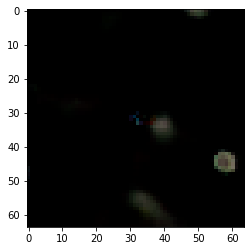

In [82]:
zq = model.residue_vae.prior.sample(4)
out = model.residue_vae.decode(zq)
plt.imshow(out[3])

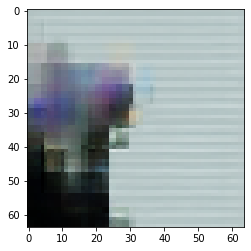

In [112]:
zq = model.vae.prior.sample(4)
out = model.vae.decode(zq)
plt.imshow(out[3])

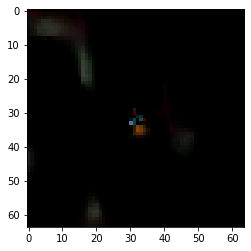

In [20]:
dsb = rl755.data.generic.ResidualEncodedRollouts(env)
x = dsb.rollouts_ds(split="train", process_observations=True).as_numpy_iterator()

TODO: THIS IS JUST A TEST VERSION OF ENCODED ROLLOUTS!!!


In [21]:
next(x)["observations"].shape

(1001, 64)